# Preamble

importing

In [2]:
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs

from sklearn.inspection import DecisionBoundaryDisplay

from plot_utils import visualize_tree, grid_plot


Making test data

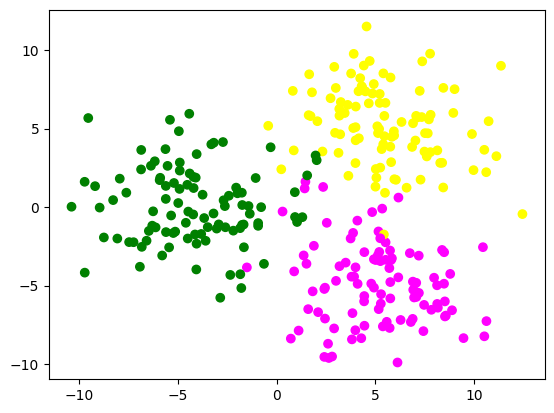

In [3]:
centers=[[-5, 0], [5, 5], [5, -5]]
blobs = make_blobs(centers=centers, cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

# Fitting a decision tree

Creating and fitting on the data. I didn't create train and test sets. This is only for visualization.

In [4]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504, min_impurity_decrease=.02)
tree_clf.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=504)

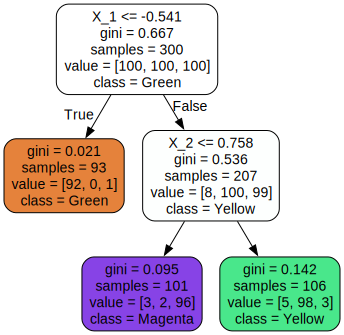

In [5]:
visualize_tree(tree_clf, ["X_1", "X_2"], ["Green", "Yellow", "Magenta"])

The position in the center is predicted as magenta. You can also see this by following the decision tree.

In [6]:
tree_clf.predict([[0, 0]])

array([2])

The decision tree is quite clean, but of course it can't be perfect. We can check the probabilities of the predictions. These are proportional to the number of samples of the category in the leaf.

In [7]:
tree_clf.predict_proba([[0, 0]])

array([[0.02970297, 0.01980198, 0.95049505]])

This plot shows how the decision tree bisects the sample space into rectangles. Note that all lines are horizontal or vertical.

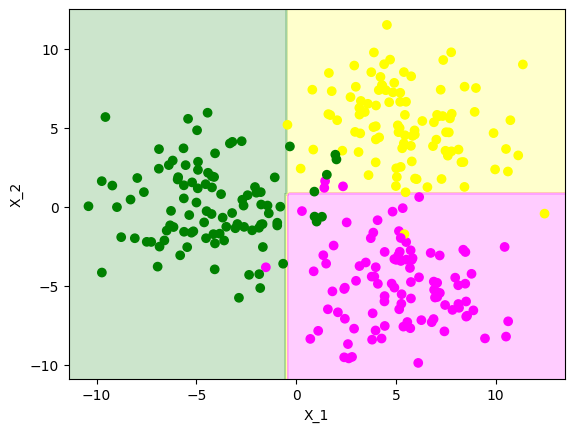

In [8]:
DecisionBoundaryDisplay.from_estimator(tree_clf, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


# A harder example

Let's try creating a harder example

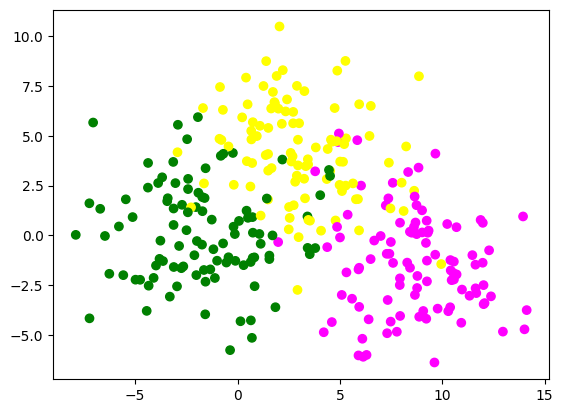

In [9]:
blobs = make_blobs(centers=[[-2.5, 0], [2.5, 4], [8.5, -1.5]], cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [10]:

tree_clf = DecisionTreeClassifier(random_state=504, min_impurity_decrease=.02)
tree_clf.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=504)

We can see that this is a lot more complex even without changing the hyperparameters. The bisection of the sample space is also a lot more complex and seems to have weird artifacts not in the data.

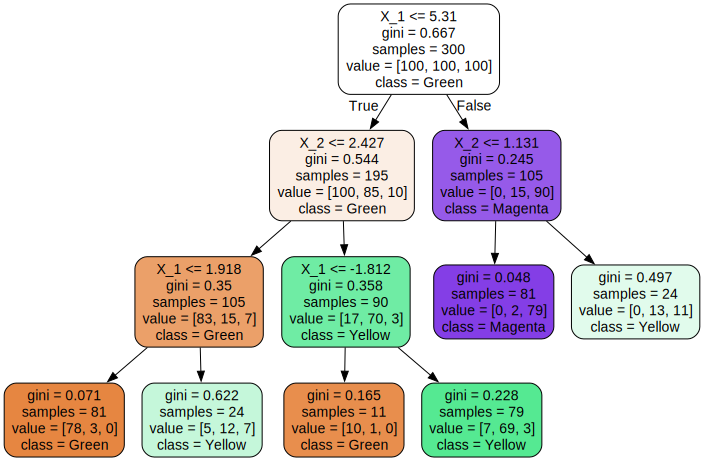

In [11]:
visualize_tree(tree_clf, ["X_1", "X_2"], ["Green", "Yellow", "Magenta"])

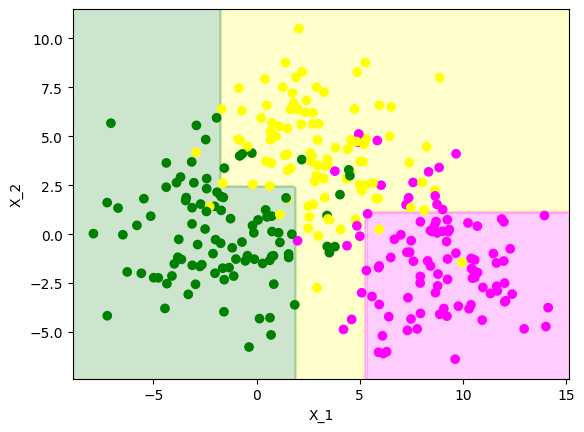

In [12]:
DecisionBoundaryDisplay.from_estimator(tree_clf, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


# Overfitting

Let's try tuning the hyperparameters to get a more precise result.

In [13]:

tree_clf = DecisionTreeClassifier(random_state=504)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=504)

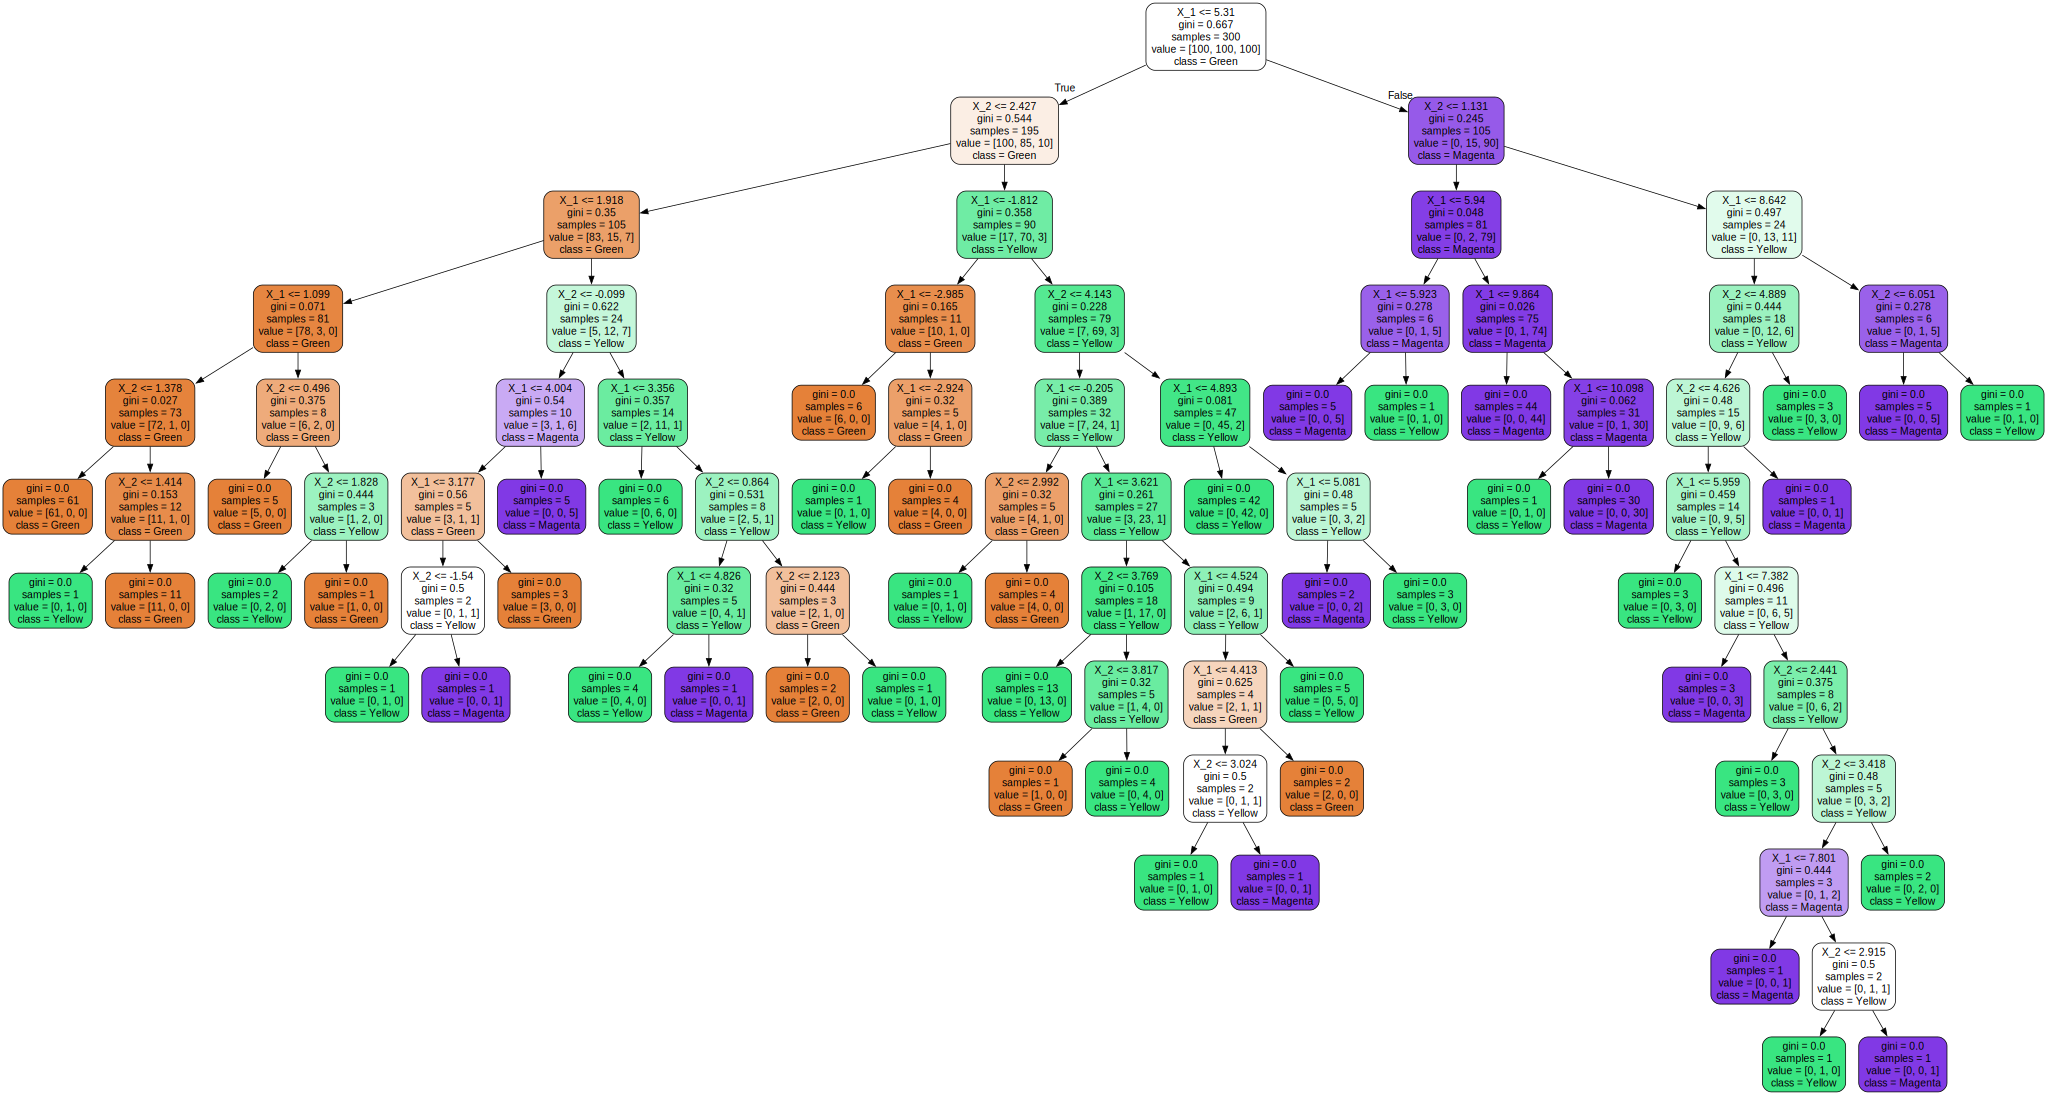

In [14]:
visualize_tree(tree_clf, ["X_1", "X_2"], ["Green", "Yellow", "Magenta"])

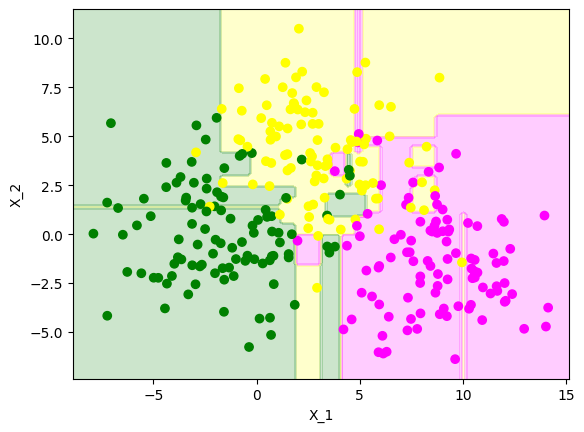

In [15]:
DecisionBoundaryDisplay.from_estimator(tree_clf, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


Even without a test set, we can clearly see the overfitting.

# Random forest

Let's create a random forest to tackle the problem. We use 15 trees in the forest, which is low, but good for visualization.

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=504, min_impurity_decrease=.02, max_features=2)
forest_clf.fit(X, y)

RandomForestClassifier(max_features=2, min_impurity_decrease=0.02,
                       random_state=504)

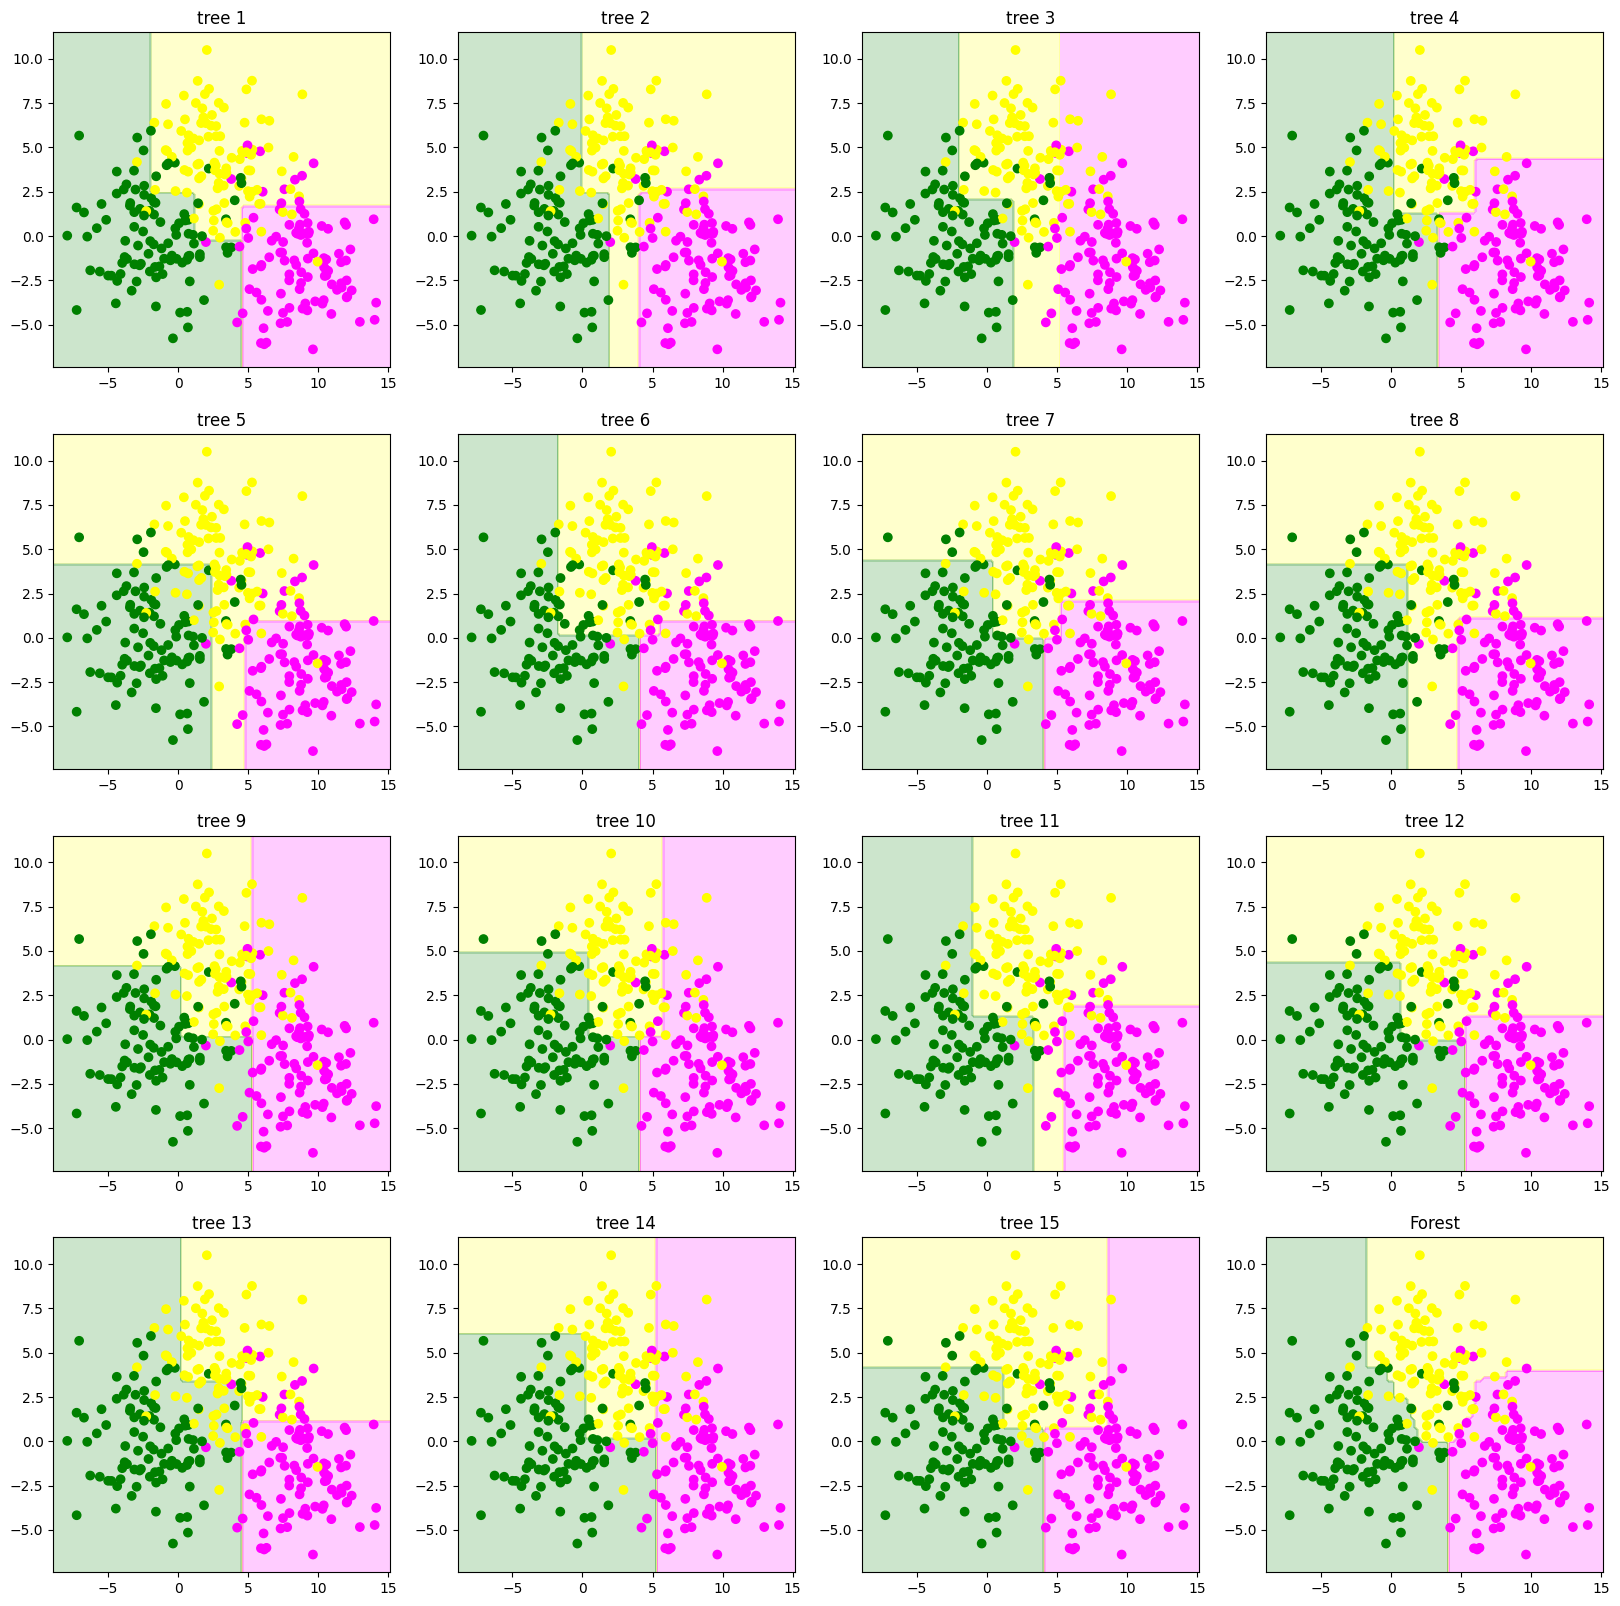

In [17]:
trees = forest_clf.estimators_

def plot(ax, model, title):
    ax.set_title(title)
    DecisionBoundaryDisplay.from_estimator(model, X, ax=ax, alpha=.2, cmap=colors)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

def tree_plot(ax, tree, index):
    plot(ax, tree, "tree {}".format(index + 1))

axes = grid_plot(trees[:15], 4, 4, tree_plot)
plot(axes[3][3], forest_clf, "Forest")


Clearly, the forest is better than any individual attempt